In [3]:
# %load graph.py
#!/usr/bin/env python

# In[ ]:


import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

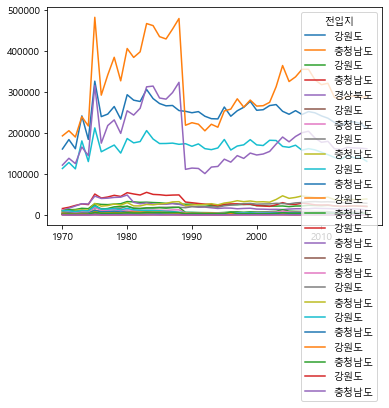

In [85]:

df = pd.read_excel('./시도별 전출입 인구수.xlsx', header=0)
df = df.fillna(method='ffill')

mask = (df['전출지별']=='서울특별시') & (df['전입지별'] == '경상북도')|\
(df['전입지별']=='충청남도')|(df['전입지별'] == '강원도')

df_data = df[mask]

df_data = df_data.drop(['전출지별'], axis=1) 
df_data.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_data.set_index('전입지', inplace=True)

df_data.columns = df_data.columns.map(int)
df_t = df_data.T
df_t.plot()

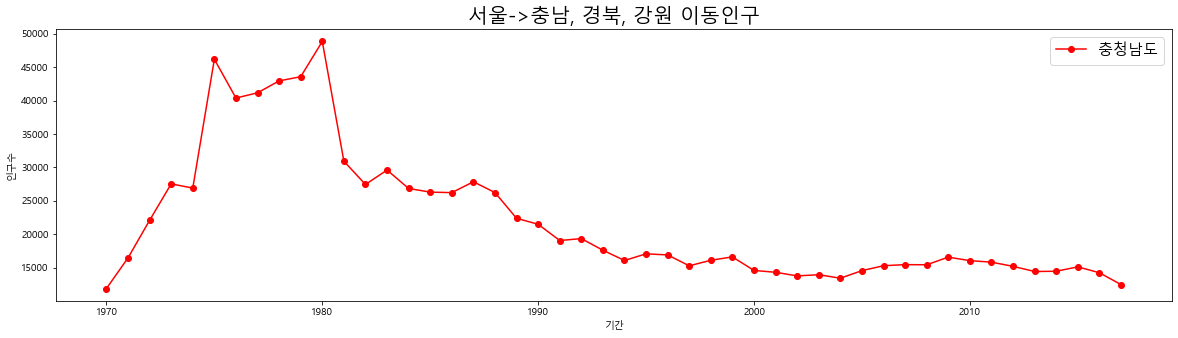

In [89]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(df_t.index, df_t['충청남도'], marker='o', color='red')
ax.plot(df_t.index, df_t['경상북도'], marker='+', color='b')
ax.plot(df_t.index, df_t['강원도'], marker='.', color='black')

ax.set_title("서울->충남, 경북, 강원 이동인구", size=20)
ax.set_xlabel("기간")
ax.set_ylabel("인구수")

legend_labels = ['충청남도', '경상북도','강원도']
ax.legend(legend_labels,loc='best', fontsize=15)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

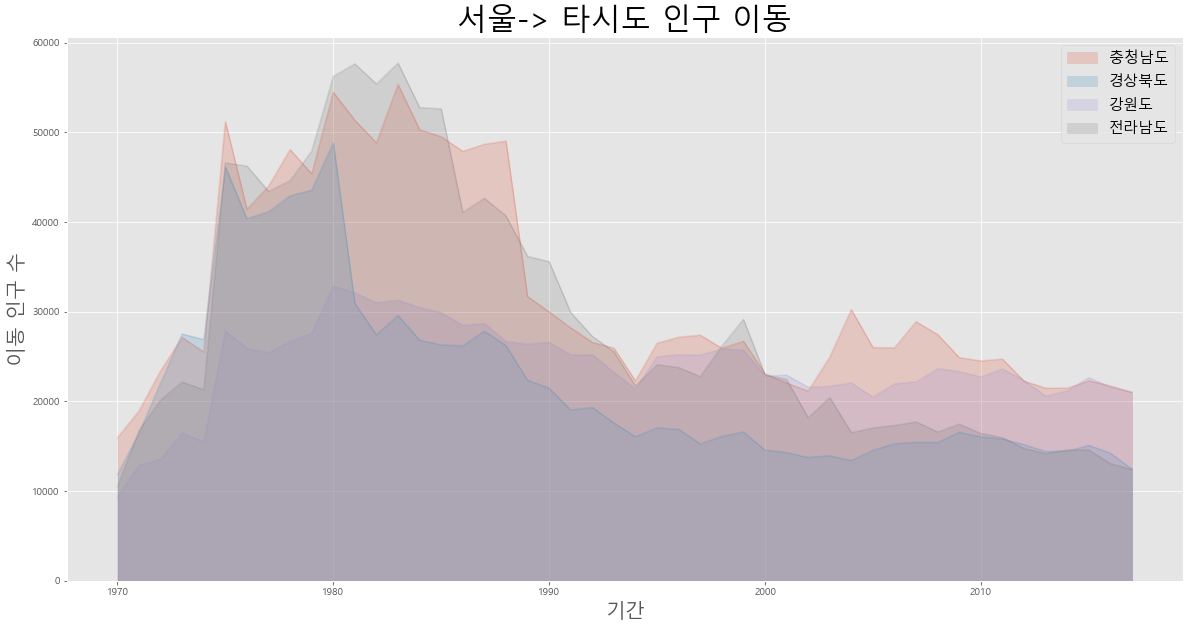

In [94]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.T

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10)) # 면적 그래프

plt.title('서울-> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

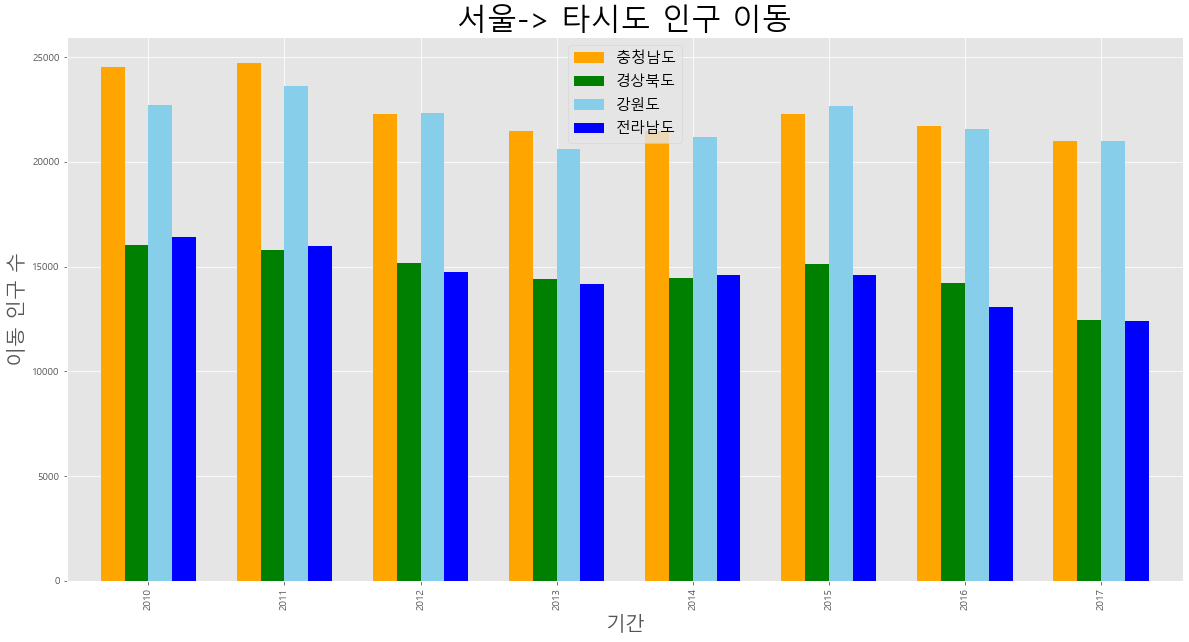

In [97]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.T

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='bar', figsize=(20,10), width=0.7,
         color=['orange','green','skyblue','blue'])

plt.title('서울-> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show

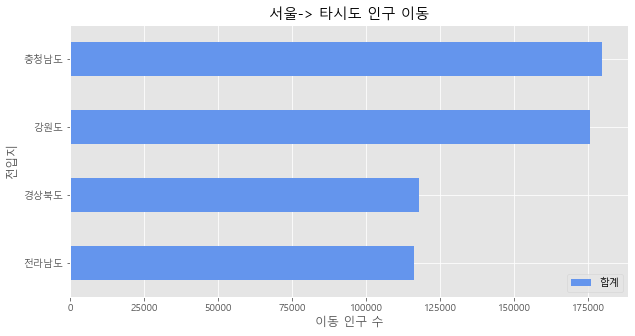

In [101]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

df_4['합계'] = df_4.sum(axis=1)

df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

plt.style.use('ggplot')

df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))
plt.title('서울-> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()